In [ ]:
# importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing Data

In [2]:
df=pd.read_csv('Customer Churn.csv')

In [ ]:
# View data

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# checking about data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# replacing blank Values with 0(tenure is 0 and no total charges are recorded) and converting datatype into float

In [11]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [15]:
# checking null values in data
df.isnull().sum().sum()

0

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# checking dulpicate data

In [19]:
df.duplicated().sum()

0

In [20]:
# converting 0 and 1 values of SeniorCitizen to Yes and No  

In [21]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [22]:
# Checking Count of Churn Customers

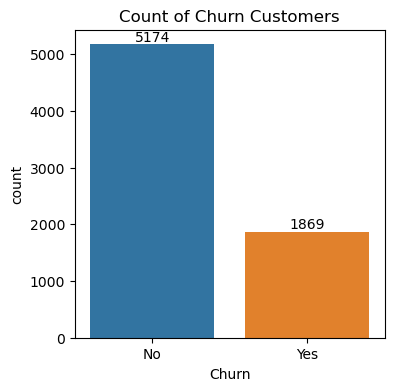

In [44]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Churn Customers")
plt.show()

In [24]:
# Checking Percentage of Churn Cunstomers

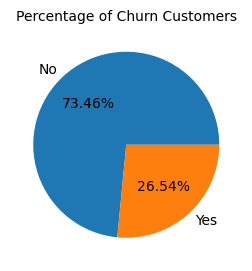

In [41]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churn Customers",fontsize=10)
plt.show()

#From the given pie chart we can conclude thet 26.54% of our customers have churned out.

In [ ]:
# Checking Count of Churn Customers by Gender

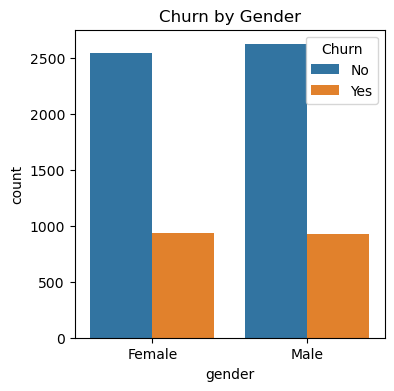

In [53]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

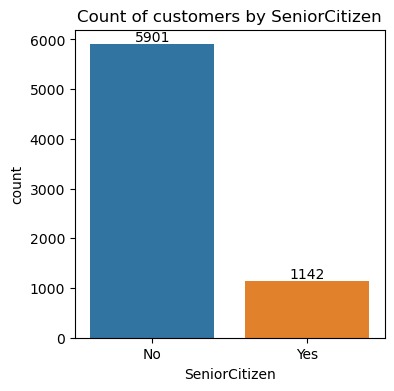

In [82]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by SeniorCitizen")
plt.show()

In [ ]:
# Checking Count of Churn Customers by Senior Citizen

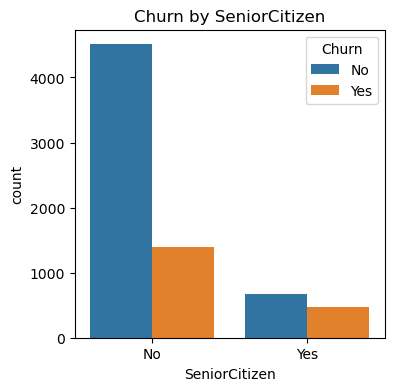

In [60]:
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen",data=df,hue="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

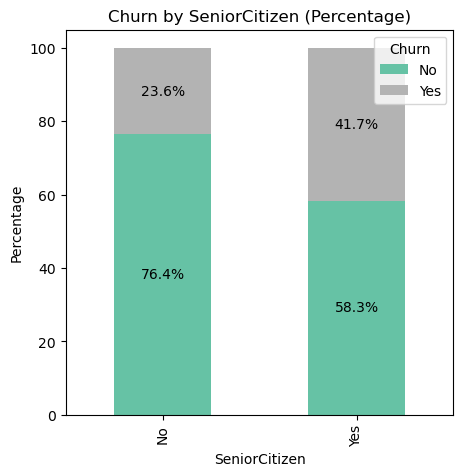

In [79]:
# Calculate percentages
grouped = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
grouped.plot(kind='bar', stacked=True, figsize=(5, 5), colormap='Set2')

# Add percentages on the bars
for i, (index, row) in enumerate(grouped.iterrows()):
    cumulative = 0
    for churn_status, value in row.items():
        plt.text(i, cumulative + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10)
        cumulative += value

plt.title("Churn by SeniorCitizen (Percentage)")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.legend(title="Churn", loc='upper right')
plt.show()

#Comparative a greater Percentage of people in senior citizen category have churn

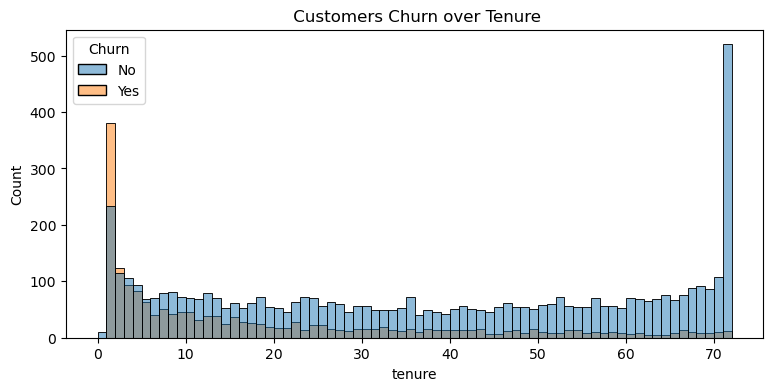

In [67]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.title(" Customers Churn over Tenure")
plt.show()

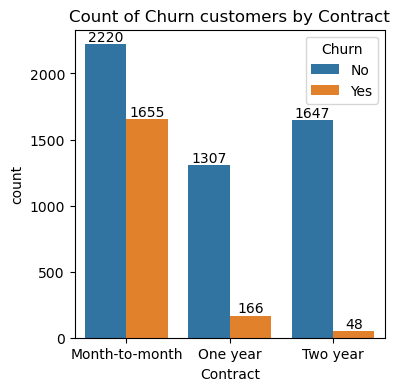

In [88]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Churn customers by Contract")
plt.show()

Pepole who have month to month contract are likely to churn then frome those whi have 1 or 2 years of contract

In [69]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

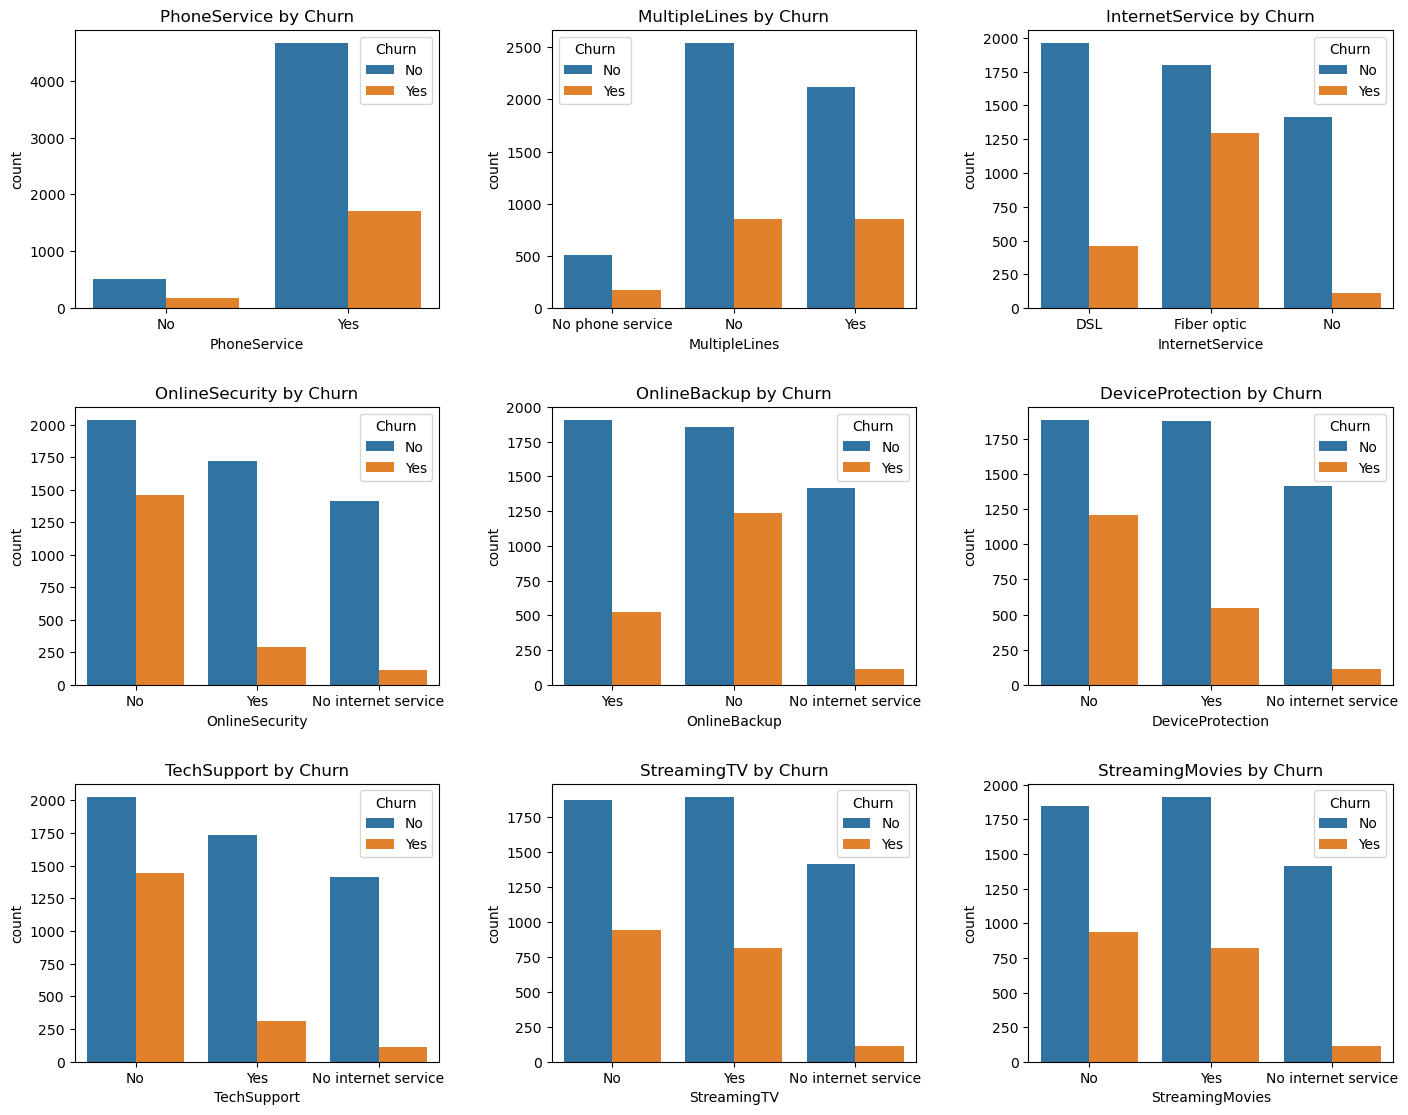

In [81]:
# List of columns to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set figure size and number of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.tight_layout(pad=5.0)

# Loop through columns and create count plots
for i, col in enumerate(columns):
    row, col_num = divmod(i, 3)
    sns.countplot(x=col, data=df,hue="Churn" ,ax=axes[row, col_num])
    axes[row, col_num].set_title(f'{col} by Churn')

plt.show()

#The Majority of Customers who do not churn tend to have services like PhoneService,InternetService(poarticularly DSL),and OnlineSecurity enabled.For services like OnlineBackup,TechSupport,and SteamingTV, Churn rate are noticeably higher when these are not used or unavailable

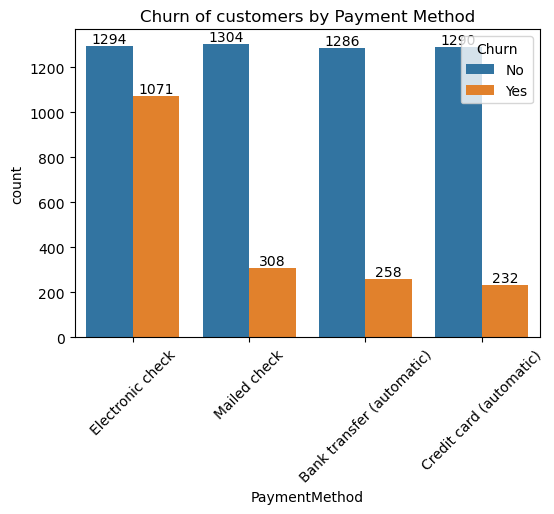

In [90]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn of customers by Payment Method")
plt.xticks(rotation=45)
plt.show()

#Customers is likely to churn when using electronic check as a payment method